In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import datetime
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

import matplotlib
# matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

In [2]:
df = pd.read_csv('./datasets/비강남.csv')
df

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채5년(평균),국고채10년(평균),...,BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,선행지수순환변동치,EPU,장단기금리spread,금값종가,LTV,물건금액(만원)
0,노원구,2016-01-01,39.96,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,25,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,18000
1,성동구,2016-01-01,75.37,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,26,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,55200
2,금천구,2016-01-01,84.83,3,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,14,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,36800
3,은평구,2016-01-01,101.97,9,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,6,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,67600
4,노원구,2016-01-01,84.59,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,26,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,30300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435741,영등포구,2022-12-31,59.94,11,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,26,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.4,77000
435742,중랑구,2022-12-31,84.09,19,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,28,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.4,69250
435743,강서구,2022-12-31,84.98,15,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,5,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.2,113500
435744,양천구,2022-12-31,64.02,5,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,26,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.4,37000


In [3]:
# Train : 2016-2020
# Test : 2021-2022

df['계약일'] = pd.to_datetime(df['계약일'])

# Train/Test Split

In [4]:
# Train : 2016-2020
# Test : 2021-2022

df['계약일'] = pd.to_datetime(df['계약일'])

In [5]:
train_df = df.loc[df['계약일'] < '2021']

In [6]:
test_df = df.loc[df['계약일'] >= '2021']

# feature & target split

In [7]:
# Train Split
# feature & target  split

X_train_df = train_df.drop('물건금액(만원)', axis=1)
y = train_df['물건금액(만원)']

# X_train : 숫자형 컬럼만 
X_train = X_train_df.select_dtypes([np.number])

In [8]:
# Test Split
# feature & target  split

X_test_df = test_df.drop('물건금액(만원)', axis=1)
y_test = test_df['물건금액(만원)']

# X_test : 숫자형 컬럼만 
X_test = X_test_df.select_dtypes([np.number])

# Scaling
1. Features - MinMax
2. Target - Log

In [9]:
# minMax
from sklearn.preprocessing import MinMaxScaler

# Scaler 객체 생성
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [10]:
# y -> log 변환

# Train
y_scaled = np.log10(y)
# y_scaled

# Test
y_test_scaled = np.log10(y_test)
y_test_scaled

367830    4.716003
367831    4.722634
367832    4.380211
367833    4.361728
367834    5.033424
            ...   
435741    4.886491
435742    4.840420
435743    5.054996
435744    4.568202
435745    4.883661
Name: 물건금액(만원), Length: 67916, dtype: float64

# OLS - Scaling 후
## OLS_1

In [11]:
# OLS_1
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                 2.485e+04
Date:                Fri, 30 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:45:41   Log-Likelihood:             1.8601e+05
No. Observations:              367830   AIC:                        -3.720e+05
Df Residuals:                  367810   BIC:                        -3.718e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.4503      0.007    598.719      0.000       4.436       4.465
건물면적(㎡)               1.3508      0.002    553.623      0.000       1.346       1.356
층                     0.2456      0.003     81.748      0.000       0.240       0.252
KOSPI종가               0.0354      0.006      6.124      0.000       0.024       0.047
Fed기준금리              -0.0875      0.003    -25.599      0.000      -0.094      -0.081
국제유가(Dubai)($/배럴)     0.1017      0.003     30.963      0.000       0.095       0.108
부동산거래량                0.0338      0.002     19.095      0.000       0.030       0.037
국고채5년(평균)            -0.0819      0.018     -4.580      0.000      -0.117      -0.047
국고채10년(평균)            0.1082      0.013      8.153      0.000       0.082       0.134
회사채3년(평균)             0.0702      0.005     13.331      0.000       0.060       0.081
CD91물(평균)            -0.0496      0.008     -6.512      0.000      -0.065      -0.035
BOK기준금리              -0.0755      0.006    -11.760      0.000      -0.088      -0.063
건물연식                 -0.1271      0.002    -77.405      0.000      -0.130      -0.124
GDP대비가계부채비율           0.0772      0.005     14.213      0.000       0.067       0.088
환율종가                  0.0279      0.003      9.828      0.000       0.022       0.033
선행지수순환변동치             0.0717      0.004     16.751      0.000       0.063       0.080
EPU                  -0.0038      0.002     -2.189      0.029      -0.007      -0.000
장단기금리spread          -0.1861      0.008    -23.034      0.000      -0.202      -0.170
금값종가                  0.0247      0.005      4.699      0.000       0.014       0.035
LTV                  -0.1735      0.002    -86.094      0.000      -0.177      -0.170
==============================================================================
Omnibus:                     3542.485   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5628.205
Skew:                          -0.071   Prob(JB):                         0.00
Kurtosis:                       3.589   Cond. No.                         209.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF_1

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(X_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_scaled.values,i)
                         for i in range(X_scaled.shape[1])]
    vif["Feature"] = X_scaled.columns
    return vif

In [13]:
# VIF_1
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

     VIF_Factor            Feature
0      7.238921            건물면적(㎡)
1      5.322501                  층
2    152.785915            KOSPI종가
3     54.231745            Fed기준금리
4     65.513695  국제유가(Dubai)($/배럴)
5     10.889562             부동산거래량
6   1206.788655          국고채5년(평균)
7    865.079190         국고채10년(평균)
8    128.735411          회사채3년(평균)
9    281.691578          CD91물(평균)
10   255.108747            BOK기준금리
11     5.971190               건물연식
12   107.399026        GDP대비가계부채비율
13    27.458732               환율종가
14   122.234382          선행지수순환변동치
15     5.516556                EPU
16   206.435228        장단기금리spread
17    65.850532               금값종가
18    31.509477                LTV


### 국고채5년(평균) 컬럼 삭제

In [14]:
X_scaled.drop('국고채5년(평균)', axis=1, inplace=True)

## OLS_2

In [15]:
# OLS_2
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                 2.622e+04
Date:                Fri, 30 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:47:27   Log-Likelihood:             1.8600e+05
No. Observations:              367830   AIC:                        -3.720e+05
Df Residuals:                  367811   BIC:                        -3.718e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.4657      0.007    673.102      0.000       4.453       4.479
건물면적(㎡)               1.3508      0.002    553.600      0.000       1.346       1.356
층                     0.2456      0.003     81.729      0.000       0.240       0.251
KOSPI종가               0.0355      0.006      6.128      0.000       0.024       0.047
Fed기준금리              -0.0918      0.003    -27.869      0.000      -0.098      -0.085
국제유가(Dubai)($/배럴)     0.1016      0.003     30.919      0.000       0.095       0.108
부동산거래량                0.0339      0.002     19.180      0.000       0.030       0.037
국고채10년(평균)            0.0593      0.008      7.523      0.000       0.044       0.075
회사채3년(평균)             0.0632      0.005     12.540      0.000       0.053       0.073
CD91물(평균)            -0.0630      0.007     -8.962      0.000      -0.077      -0.049
BOK기준금리              -0.0879      0.006    -15.118      0.000      -0.099      -0.076
건물연식                 -0.1271      0.002    -77.416      0.000      -0.130      -0.124
GDP대비가계부채비율           0.0840      0.005     16.060      0.000       0.074       0.094
환율종가                  0.0327      0.003     12.392      0.000       0.028       0.038
선행지수순환변동치             0.0737      0.004     17.306      0.000       0.065       0.082
EPU                  -0.0055      0.002     -3.254      0.001      -0.009      -0.002
장단기금리spread          -0.2095      0.006    -33.489      0.000      -0.222      -0.197
금값종가                  0.0186      0.005      3.652      0.000       0.009       0.029
LTV                  -0.1718      0.002    -86.708      0.000      -0.176      -0.168
==============================================================================
Omnibus:                     3531.944   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5609.989
Skew:                          -0.071   Prob(JB):                         0.00
Kurtosis:                       3.588   Cond. No.                         103.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF_2

In [16]:
# VIF_2
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     7.211643            건물면적(㎡)
1     5.315839                  층
2   148.158554            KOSPI종가
3    48.305125            Fed기준금리
4    65.513456  국제유가(Dubai)($/배럴)
5    10.882952             부동산거래량
6   246.570659         국고채10년(평균)
7   118.529686          회사채3년(평균)
8   274.234919          CD91물(평균)
9   233.898925            BOK기준금리
10    5.965592               건물연식
11   90.816406        GDP대비가계부채비율
12   18.798953               환율종가
13  120.180620          선행지수순환변동치
14    5.421308                EPU
15  154.994187        장단기금리spread
16   64.006552               금값종가
17   26.276321                LTV


### CD91물(평균) 컬럼 삭제

In [17]:
X_scaled.drop('CD91물(평균)', axis=1, inplace=True)

## OLS_3

In [18]:
# OLS_3
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                 2.775e+04
Date:                Fri, 30 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:48:55   Log-Likelihood:             1.8596e+05
No. Observations:              367830   AIC:                        -3.719e+05
Df Residuals:                  367812   BIC:                        -3.717e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.4353      0.006    777.087      0.000       4.424       4.447
건물면적(㎡)               1.3511      0.002    553.709      0.000       1.346       1.356
층                     0.2456      0.003     81.711      0.000       0.240       0.251
KOSPI종가               0.0487      0.006      8.698      0.000       0.038       0.060
Fed기준금리              -0.0963      0.003    -29.620      0.000      -0.103      -0.090
국제유가(Dubai)($/배럴)     0.1025      0.003     31.224      0.000       0.096       0.109
부동산거래량                0.0318      0.002     18.157      0.000       0.028       0.035
국고채10년(평균)            0.0159      0.006      2.554      0.011       0.004       0.028
회사채3년(평균)             0.0768      0.005     15.989      0.000       0.067       0.086
BOK기준금리              -0.1161      0.005    -23.746      0.000      -0.126      -0.107
건물연식                 -0.1272      0.002    -77.440      0.000      -0.130      -0.124
GDP대비가계부채비율           0.0850      0.005     16.258      0.000       0.075       0.095
환율종가                  0.0360      0.003     13.781      0.000       0.031       0.041
선행지수순환변동치             0.0876      0.004     22.124      0.000       0.080       0.095
EPU                  -0.0045      0.002     -2.655      0.008      -0.008      -0.001
장단기금리spread          -0.1972      0.006    -32.305      0.000      -0.209      -0.185
금값종가                  0.0208      0.005      4.085      0.000       0.011       0.031
LTV                  -0.1710      0.002    -86.375      0.000      -0.175      -0.167
==============================================================================
Omnibus:                     3516.512   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5587.227
Skew:                          -0.070   Prob(JB):                         0.00
Kurtosis:                       3.588   Cond. No.                         83.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF_3

In [19]:
# VIF_3
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     7.178629            건물면적(㎡)
1     5.301329                  층
2   147.043549            KOSPI종가
3    48.129000            Fed기준금리
4    65.458650  국제유가(Dubai)($/배럴)
5    10.774105             부동산거래량
6   184.768950         국고채10년(평균)
7   101.642881          회사채3년(평균)
8    72.043462            BOK기준금리
9     5.952072               건물연식
10   87.762912        GDP대비가계부채비율
11   18.306977               환율종가
12  103.195088          선행지수순환변동치
13    5.420916                EPU
14  153.847131        장단기금리spread
15   63.934517               금값종가
16   24.297655                LTV


### 국고채10년(평균) 컬럼 삭제

In [20]:
X_scaled.drop('국고채10년(평균)', axis=1, inplace=True)

## OLS_4

In [21]:
# OLS_4
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                 2.949e+04
Date:                Fri, 30 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:50:02   Log-Likelihood:             1.8595e+05
No. Observations:              367830   AIC:                        -3.719e+05
Df Residuals:                  367813   BIC:                        -3.717e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.4324      0.006    793.281      0.000       4.421       4.443
건물면적(㎡)               1.3510      0.002    553.700      0.000       1.346       1.356
층                     0.2456      0.003     81.714      0.000       0.240       0.251
KOSPI종가               0.0470      0.006      8.460      0.000       0.036       0.058
Fed기준금리              -0.0948      0.003    -29.675      0.000      -0.101      -0.089
국제유가(Dubai)($/배럴)     0.1021      0.003     31.135      0.000       0.096       0.109
부동산거래량                0.0317      0.002     18.076      0.000       0.028       0.035
회사채3년(평균)             0.0842      0.004     21.925      0.000       0.077       0.092
BOK기준금리              -0.1118      0.005    -24.361      0.000      -0.121      -0.103
건물연식                 -0.1271      0.002    -77.424      0.000      -0.130      -0.124
GDP대비가계부채비율           0.0850      0.005     16.258      0.000       0.075       0.095
환율종가                  0.0369      0.003     14.250      0.000       0.032       0.042
선행지수순환변동치             0.0917      0.004     25.261      0.000       0.085       0.099
EPU                  -0.0042      0.002     -2.462      0.014      -0.008      -0.001
장단기금리spread          -0.1918      0.006    -33.444      0.000      -0.203      -0.181
금값종가                  0.0180      0.005      3.616      0.000       0.008       0.028
LTV                  -0.1705      0.002    -86.497      0.000      -0.174      -0.167
==============================================================================
Omnibus:                     3514.276   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5581.642
Skew:                          -0.070   Prob(JB):                         0.00
Kurtosis:                       3.587   Cond. No.                         80.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF_4

In [22]:
# VIF_4
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     7.167283            건물면적(㎡)
1     5.299294                  층
2   142.116428            KOSPI종가
3    45.636249            Fed기준금리
4    65.285447  국제유가(Dubai)($/배럴)
5    10.763303             부동산거래량
6    54.005316          회사채3년(평균)
7    65.483076            BOK기준금리
8     5.951323               건물연식
9    87.133949        GDP대비가계부채비율
10   18.285803               환율종가
11   83.336699          선행지수순환변동치
12    5.405397                EPU
13  141.677343        장단기금리spread
14   59.770790               금값종가
15   24.281037                LTV


### KOSPI종가 컬럼 삭제

In [23]:
X_scaled.drop('KOSPI종가', axis=1, inplace=True)

## OLS_5

In [24]:
# OLS_5
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                 3.144e+04
Date:                Fri, 30 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:51:19   Log-Likelihood:             1.8592e+05
No. Observations:              367830   AIC:                        -3.718e+05
Df Residuals:                  367814   BIC:                        -3.716e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.4471      0.005    837.853      0.000       4.437       4.458
건물면적(㎡)               1.3507      0.002    553.583      0.000       1.346       1.355
층                     0.2455      0.003     81.686      0.000       0.240       0.251
Fed기준금리              -0.0951      0.003    -29.791      0.000      -0.101      -0.089
국제유가(Dubai)($/배럴)     0.1059      0.003     32.567      0.000       0.099       0.112
부동산거래량                0.0350      0.002     20.483      0.000       0.032       0.038
회사채3년(평균)             0.0978      0.003     28.046      0.000       0.091       0.105
BOK기준금리              -0.1139      0.005    -24.866      0.000      -0.123      -0.105
건물연식                 -0.1270      0.002    -77.328      0.000      -0.130      -0.124
GDP대비가계부채비율           0.0856      0.005     16.363      0.000       0.075       0.096
환율종가                  0.0305      0.002     12.304      0.000       0.026       0.035
선행지수순환변동치             0.1136      0.003     44.581      0.000       0.109       0.119
EPU                  -0.0053      0.002     -3.122      0.002      -0.009      -0.002
장단기금리spread          -0.2085      0.005    -38.683      0.000      -0.219      -0.198
금값종가                  0.0321      0.005      6.863      0.000       0.023       0.041
LTV                  -0.1752      0.002    -92.699      0.000      -0.179      -0.172
==============================================================================
Omnibus:                     3532.671   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5607.912
Skew:                          -0.071   Prob(JB):                         0.00
Kurtosis:                       3.588   Cond. No.                         70.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF_5

In [25]:
# VIF_5
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     7.157954            건물면적(㎡)
1     5.294083                  층
2    45.344421            Fed기준금리
3    63.919415  국제유가(Dubai)($/배럴)
4    10.199512             부동산거래량
5    48.295774          회사채3년(평균)
6    59.534455            BOK기준금리
7     5.941559               건물연식
8    85.145803        GDP대비가계부채비율
9    17.775157               환율종가
10   43.342342          선행지수순환변동치
11    5.395568                EPU
12  134.325150        장단기금리spread
13   48.798824               금값종가
14   23.783880                LTV


### 장단기금리spread 컬럼 삭제

In [26]:
X_scaled.drop('장단기금리spread', axis=1, inplace=True)

## OLS_6

In [27]:
# OLS_6
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                 3.345e+04
Date:                Fri, 30 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:52:13   Log-Likelihood:             1.8517e+05
No. Observations:              367830   AIC:                        -3.703e+05
Df Residuals:                  367815   BIC:                        -3.702e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.3580      0.005    909.704      0.000       4.349       4.367
건물면적(㎡)               1.3525      0.002    553.310      0.000       1.348       1.357
층                     0.2464      0.003     81.799      0.000       0.240       0.252
Fed기준금리              -0.0782      0.003    -24.672      0.000      -0.084      -0.072
국제유가(Dubai)($/배럴)     0.0701      0.003     22.459      0.000       0.064       0.076
부동산거래량                0.0170      0.002     10.299      0.000       0.014       0.020
회사채3년(평균)            -0.0235      0.002    -15.424      0.000      -0.027      -0.021
BOK기준금리              -0.0278      0.004     -6.935      0.000      -0.036      -0.020
건물연식                 -0.1275      0.002    -77.490      0.000      -0.131      -0.124
GDP대비가계부채비율           0.1357      0.005     26.727      0.000       0.126       0.146
환율종가                  0.0288      0.002     11.599      0.000       0.024       0.034
선행지수순환변동치             0.0455      0.002     24.648      0.000       0.042       0.049
EPU                  -0.0125      0.002     -7.408      0.000      -0.016      -0.009
금값종가                  0.0528      0.005     11.347      0.000       0.044       0.062
LTV                  -0.1529      0.002    -84.777      0.000      -0.156      -0.149
==============================================================================
Omnibus:                     3398.072   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5389.124
Skew:                          -0.064   Prob(JB):                         0.00
Kurtosis:                       3.579   Cond. No.                         56.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF_6

In [28]:
# VIF_6
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     7.134381            건물면적(㎡)
1     5.283914                  층
2    42.304879            Fed기준금리
3    56.441792  국제유가(Dubai)($/배럴)
4     9.091976             부동산거래량
5    10.848778          회사채3년(평균)
6    55.559956            BOK기준금리
7     5.923224               건물연식
8    84.522918        GDP대비가계부채비율
9    16.516729               환율종가
10   18.224546          선행지수순환변동치
11    5.238749                EPU
12   48.723509               금값종가
13   23.477533                LTV


### GDP대비가계부채비율 컬럼 삭제

In [29]:
X_scaled.drop('GDP대비가계부채비율', axis=1, inplace=True)

## OLS_7

In [30]:
# OLS_7
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                 3.589e+04
Date:                Fri, 30 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:53:05   Log-Likelihood:             1.8481e+05
No. Observations:              367830   AIC:                        -3.696e+05
Df Residuals:                  367816   BIC:                        -3.694e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.4021      0.005    977.973      0.000       4.393       4.411
건물면적(㎡)               1.3492      0.002    552.130      0.000       1.344       1.354
층                     0.2455      0.003     81.445      0.000       0.240       0.251
Fed기준금리              -0.0354      0.003    -12.936      0.000      -0.041      -0.030
국제유가(Dubai)($/배럴)     0.0826      0.003     26.721      0.000       0.077       0.089
부동산거래량                0.0200      0.002     12.136      0.000       0.017       0.023
회사채3년(평균)            -0.0121      0.001     -8.225      0.000      -0.015      -0.009
BOK기준금리              -0.0967      0.003    -31.387      0.000      -0.103      -0.091
건물연식                 -0.1262      0.002    -76.631      0.000      -0.129      -0.123
환율종가                  0.0353      0.002     14.311      0.000       0.031       0.040
선행지수순환변동치             0.0442      0.002     23.954      0.000       0.041       0.048
EPU                  -0.0118      0.002     -7.025      0.000      -0.015      -0.009
금값종가                  0.1372      0.003     40.045      0.000       0.130       0.144
LTV                  -0.1685      0.002    -98.523      0.000      -0.172      -0.165
==============================================================================
Omnibus:                     3151.397   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4928.662
Skew:                          -0.059   Prob(JB):                         0.00
Kurtosis:                       3.555   Cond. No.                         48.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF_7

In [31]:
# VIF_7
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     7.133784            건물면적(㎡)
1     5.278721                  층
2    33.814006            Fed기준금리
3    53.201640  국제유가(Dubai)($/배럴)
4     8.890846             부동산거래량
5     9.856209          회사채3년(평균)
6    34.871625            BOK기준금리
7     5.891071               건물연식
8    14.599263               환율종가
9    17.809351          선행지수순환변동치
10    5.208466                EPU
11   10.158718               금값종가
12   22.482265                LTV


### 국제유가(Dubai)($/배럴)v 컬럼 삭제

In [32]:
X_scaled.drop('국제유가(Dubai)($/배럴)', axis=1, inplace=True)

## OLS_8

In [33]:
# OLS_8
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                 3.875e+04
Date:                Fri, 30 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:56:30   Log-Likelihood:             1.8446e+05
No. Observations:              367830   AIC:                        -3.689e+05
Df Residuals:                  367817   BIC:                        -3.687e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4354      0.004   1024.489      0.000       4.427       4.444
건물면적(㎡)        1.3502      0.002    552.025      0.000       1.345       1.355
층              0.2454      0.003     81.329      0.000       0.239       0.251
Fed기준금리        0.0087      0.002      3.990      0.000       0.004       0.013
부동산거래량         0.0335      0.002     21.425      0.000       0.030       0.037
회사채3년(평균)      0.0023      0.001      1.701      0.089      -0.000       0.005
BOK기준금리       -0.1013      0.003    -32.925      0.000      -0.107      -0.095
건물연식          -0.1262      0.002    -76.601      0.000      -0.129      -0.123
환율종가           0.0042      0.002      1.936      0.053   -5.13e-05       0.008
선행지수순환변동치      0.0386      0.002     20.999      0.000       0.035       0.042
EPU            0.0013      0.002      0.825      0.409      -0.002       0.004
금값종가           0.1304      0.003     38.133      0.000       0.124       0.137
LTV           -0.1687      0.002    -98.565      0.000      -0.172      -0.165
==============================================================================
Omnibus:                     3088.580   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4831.594
Skew:                          -0.054   Prob(JB):                         0.00
Kurtosis:                       3.551   Cond. No.                         44.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### EPU 컬럼 삭제

In [34]:
X_scaled.drop('EPU', axis=1, inplace=True)

## OLS_9

In [35]:
# OLS_9
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                 4.227e+04
Date:                Fri, 30 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:56:51   Log-Likelihood:             1.8446e+05
No. Observations:              367830   AIC:                        -3.689e+05
Df Residuals:                  367818   BIC:                        -3.688e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4364      0.004   1068.472      0.000       4.428       4.445
건물면적(㎡)        1.3502      0.002    552.031      0.000       1.345       1.355
층              0.2454      0.003     81.331      0.000       0.239       0.251
Fed기준금리        0.0090      0.002      4.137      0.000       0.005       0.013
부동산거래량         0.0332      0.002     22.071      0.000       0.030       0.036
회사채3년(평균)      0.0020      0.001      1.527      0.127      -0.001       0.005
BOK기준금리       -0.1019      0.003    -33.819      0.000      -0.108      -0.096
건물연식          -0.1263      0.002    -76.629      0.000      -0.129      -0.123
환율종가           0.0045      0.002      2.107      0.035       0.000       0.009
선행지수순환변동치      0.0383      0.002     21.094      0.000       0.035       0.042
금값종가           0.1299      0.003     38.536      0.000       0.123       0.137
LTV           -0.1687      0.002    -98.579      0.000      -0.172      -0.165
==============================================================================
Omnibus:                     3088.153   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4830.508
Skew:                          -0.054   Prob(JB):                         0.00
Kurtosis:                       3.551   Cond. No.                         42.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 회사채3년(평균) 컬럼 삭제

In [36]:
X_scaled.drop('회사채3년(평균)', axis=1, inplace=True)

## OLS_10

In [37]:
# OLS_10
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                 4.650e+04
Date:                Fri, 30 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:57:51   Log-Likelihood:             1.8446e+05
No. Observations:              367830   AIC:                        -3.689e+05
Df Residuals:                  367819   BIC:                        -3.688e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4375      0.004   1085.549      0.000       4.430       4.446
건물면적(㎡)        1.3501      0.002    552.039      0.000       1.345       1.355
층              0.2453      0.003     81.319      0.000       0.239       0.251
Fed기준금리        0.0094      0.002      4.384      0.000       0.005       0.014
부동산거래량         0.0328      0.001     22.107      0.000       0.030       0.036
BOK기준금리       -0.1026      0.003    -34.447      0.000      -0.108      -0.097
건물연식          -0.1262      0.002    -76.618      0.000      -0.129      -0.123
환율종가           0.0041      0.002      1.914      0.056   -9.68e-05       0.008
선행지수순환변동치      0.0396      0.002     24.149      0.000       0.036       0.043
금값종가           0.1299      0.003     38.524      0.000       0.123       0.136
LTV           -0.1692      0.002   -100.942      0.000      -0.173      -0.166
==============================================================================
Omnibus:                     3088.560   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4831.888
Skew:                          -0.054   Prob(JB):                         0.00
Kurtosis:                       3.551   Cond. No.                         40.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 환율종가 컬럼 삭제

In [38]:
X_scaled.drop('환율종가', axis=1, inplace=True)

## OLS_11

In [39]:
# OLS_11
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                 5.167e+04
Date:                Fri, 30 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:58:39   Log-Likelihood:             1.8445e+05
No. Observations:              367830   AIC:                        -3.689e+05
Df Residuals:                  367820   BIC:                        -3.688e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4423      0.003   1366.283      0.000       4.436       4.449
건물면적(㎡)        1.3501      0.002    552.053      0.000       1.345       1.355
층              0.2454      0.003     81.345      0.000       0.240       0.251
Fed기준금리        0.0097      0.002      4.508      0.000       0.005       0.014
부동산거래량         0.0325      0.001     22.025      0.000       0.030       0.035
BOK기준금리       -0.1046      0.003    -37.623      0.000      -0.110      -0.099
건물연식          -0.1262      0.002    -76.605      0.000      -0.129      -0.123
선행지수순환변동치      0.0372      0.001     34.725      0.000       0.035       0.039
금값종가           0.1278      0.003     39.972      0.000       0.122       0.134
LTV           -0.1690      0.002   -101.015      0.000      -0.172      -0.166
==============================================================================
Omnibus:                     3084.513   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4823.266
Skew:                          -0.054   Prob(JB):                         0.00
Kurtosis:                       3.550   Cond. No.                         33.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF_11

In [40]:
# VIF_11
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor    Feature
0    6.976531    건물면적(㎡)
1    5.196458          층
2   20.734498    Fed기준금리
3    7.003138     부동산거래량
4   32.795788    BOK기준금리
5    5.779867       건물연식
6    7.225367  선행지수순환변동치
7    7.179795       금값종가
8   18.496939        LTV


### BOK기준금리 컬럼 삭제

In [41]:
X_scaled.drop('BOK기준금리', axis=1, inplace=True)

## OLS_12

In [42]:
# OLS_12
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                 5.773e+04
Date:                Fri, 30 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:59:41   Log-Likelihood:             1.8375e+05
No. Observations:              367830   AIC:                        -3.675e+05
Df Residuals:                  367821   BIC:                        -3.674e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3619      0.002   1776.313      0.000       4.357       4.367
건물면적(㎡)        1.3492      0.002    550.676      0.000       1.344       1.354
층              0.2458      0.003     81.306      0.000       0.240       0.252
Fed기준금리       -0.0360      0.002    -20.350      0.000      -0.039      -0.033
부동산거래량         0.0543      0.001     39.884      0.000       0.052       0.057
건물연식          -0.1243      0.002    -75.366      0.000      -0.128      -0.121
선행지수순환변동치      0.0516      0.001     51.522      0.000       0.050       0.054
금값종가           0.2075      0.002     86.493      0.000       0.203       0.212
LTV           -0.1787      0.002   -107.890      0.000      -0.182      -0.175
==============================================================================
Omnibus:                     2970.008   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4636.370
Skew:                          -0.048   Prob(JB):                         0.00
Kurtosis:                       3.542   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF_12

In [43]:
# VIF_12
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor    Feature
0    6.676355    건물면적(㎡)
1    5.084026          층
2    4.387871    Fed기준금리
3    6.422976     부동산거래량
4    5.692728       건물연식
5    6.618951  선행지수순환변동치
6    6.680882       금값종가
7    8.491965        LTV


# LinearRegression

## CV- R2, MSE

In [45]:
# X_test 컬럼 -> X_scaled 기준(train)으로 맞추기  
X_test_scaled=X_test_scaled[X_scaled.columns]

## 교차검증

In [46]:
# CV 

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# 교차 검증을 통해 모델 평가 및 추정기 반환
cv_results = cross_validate(model, X_scaled, y_scaled, 
                            scoring= ('r2', 'neg_mean_squared_error'),cv=5, 
                            return_train_score=True, return_estimator=True)

train_scores_r2 = cv_results['train_r2']  # 훈련 점수
test_scores_r2 = cv_results['test_r2']    # 검증 점수
train_scores_mse = -cv_results['train_neg_mean_squared_error']
test_scores_mse = -cv_results['test_neg_mean_squared_error'] 

Validation_R2_score_mean = 0
Validation_MSE_mean = 0

# 훈련 점수와 검증 점수 출력
for i in range(len(train_scores_r2)):
   print(f"Fold {i+1}: Train Score_r2 = {np.round(train_scores_r2[i],5)},\
           Validation Score_r2 = {np.round(test_scores_r2[i],5)}")
   print(f"      Train Score_mse = {np.round(train_scores_mse[i],5)},\
           Validation Score_mse = {np.round(test_scores_mse[i],5)}")
   print('\n')
       # 마지막 평균 반환용
   Validation_R2_score_mean += test_scores_r2[i]
   Validation_MSE_mean += test_scores_mse[i]


print(f'CV 평균 R2 : {np.round(Validation_R2_score_mean/5,4)}')
print(f'CV 평균 MSE : {np.round(Validation_MSE_mean/5,4)}')

Fold 1: Train Score_r2 = 0.53367,           Validation Score_r2 = 0.5487
      Train Score_mse = 0.023,           Validation Score_mse = 0.01613


Fold 2: Train Score_r2 = 0.55279,           Validation Score_r2 = 0.52082
      Train Score_mse = 0.02263,           Validation Score_mse = 0.01754


Fold 3: Train Score_r2 = 0.57605,           Validation Score_r2 = 0.44453
      Train Score_mse = 0.02157,           Validation Score_mse = 0.02198


Fold 4: Train Score_r2 = 0.57789,           Validation Score_r2 = 0.42415
      Train Score_mse = 0.01974,           Validation Score_mse = 0.03047


Fold 5: Train Score_r2 = 0.53891,           Validation Score_r2 = 0.39266
      Train Score_mse = 0.0203,           Validation Score_mse = 0.03257


CV 평균 R2 : 0.4662
CV 평균 MSE : 0.0237


## 평가지표 train and test 시각화

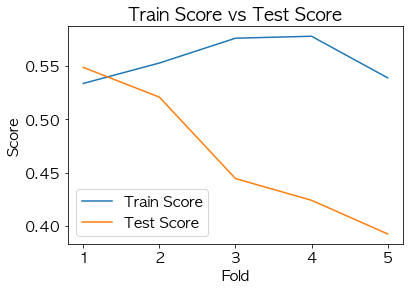

In [47]:
# R2
import matplotlib.pyplot as plt

train_scores = cv_results['train_r2']
test_scores = cv_results['test_r2']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

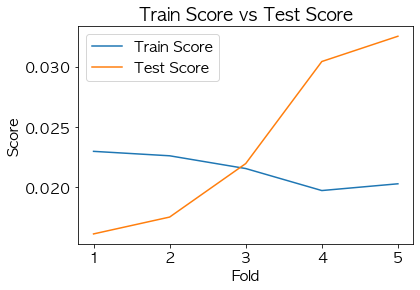

In [48]:
# MSE 
import matplotlib.pyplot as plt

train_scores = -cv_results['train_neg_mean_squared_error']
test_scores = -cv_results['test_neg_mean_squared_error']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

## Model 확정
- R2 그래프상 train & test 점수차이가 가장 적게 나는 모델 확정
- 최종 첫 번째로 확정

In [49]:
# 최종 모델 - Predict & 평가지표

y_pred = cv_results['estimator'][0].predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.042, RMSE :  0.204, MAE: 0.204
Variance score :  0.573




In [50]:
# test 계수 결과 DF 

test_result = pd.DataFrame(data= X_test_scaled.columns)
test_result.columns = ['features']

test_result['coefficient'] = cv_results['estimator'][0].coef_

test_result.sort_values('coefficient', ascending=False)

,features,coefficient
0,건물면적(㎡),1.352968
1,층,0.261184
6,금값종가,0.191599
3,부동산거래량,0.049259
5,선행지수순환변동치,0.034687
2,Fed기준금리,-0.046634
4,건물연식,-0.123235
7,LTV,-0.167867


# Ridge & Lasso

## Ridge

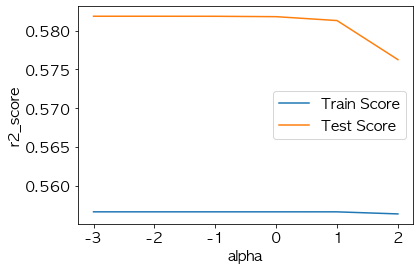

In [51]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_scaled, y_scaled)

import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_scaled, y_scaled)
    train_score.append(ridge.score(X_scaled, y_scaled))
    test_score.append(ridge.score(X_test_scaled, y_test_scaled))

plt.plot(np.log10(alpha_list), train_score, label='Train Score')
plt.plot(np.log10(alpha_list), test_score, label='Test Score')
plt.xlabel('alpha')
plt.ylabel('r2_score')
plt.legend()
plt.show()

- alpha 값이 변해도 큰 차이가 없어 기본값 alpha = 1.0으로 진행

# CV

In [52]:
# CV 

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

ridge = Ridge()
ridge.fit(X_scaled, y_scaled)
# 교차 검증을 통해 모델 평가 및 추정기 반환
cv_results = cross_validate(ridge, X_scaled, y_scaled, 
                            scoring= ('r2', 'neg_mean_squared_error'),cv=5, 
                            return_train_score=True, return_estimator=True)

train_scores_r2 = cv_results['train_r2']  # 훈련 점수
test_scores_r2 = cv_results['test_r2']    # 검증 점수
train_scores_mse = -cv_results['train_neg_mean_squared_error']
test_scores_mse = -cv_results['test_neg_mean_squared_error'] 

Validation_R2_score_mean = 0
Validation_MSE_mean = 0

# 훈련 점수와 검증 점수 출력
for i in range(len(train_scores_r2)):
   print(f"Fold {i+1}: Train Score_r2 = {np.round(train_scores_r2[i],5)},\
           Validation Score_r2 = {np.round(test_scores_r2[i],5)}")
   print(f"      Train Score_mse = {np.round(train_scores_mse[i],5)},\
           Validation Score_mse = {np.round(test_scores_mse[i],5)}")
   print('\n')
       # 마지막 평균 반환용
   Validation_R2_score_mean += test_scores_r2[i]
   Validation_MSE_mean += test_scores_mse[i]


print(f'CV 평균 R2 : {np.round(Validation_R2_score_mean/5,4)}')
print(f'CV 평균 MSE : {np.round(Validation_MSE_mean/5,4)}')

Fold 1: Train Score_r2 = 0.53367,           Validation Score_r2 = 0.54869
      Train Score_mse = 0.023,           Validation Score_mse = 0.01613


Fold 2: Train Score_r2 = 0.55279,           Validation Score_r2 = 0.52083
      Train Score_mse = 0.02263,           Validation Score_mse = 0.01754


Fold 3: Train Score_r2 = 0.57605,           Validation Score_r2 = 0.44455
      Train Score_mse = 0.02157,           Validation Score_mse = 0.02198


Fold 4: Train Score_r2 = 0.57789,           Validation Score_r2 = 0.42411
      Train Score_mse = 0.01974,           Validation Score_mse = 0.03047


Fold 5: Train Score_r2 = 0.53891,           Validation Score_r2 = 0.39255
      Train Score_mse = 0.0203,           Validation Score_mse = 0.03257


CV 평균 R2 : 0.4661
CV 평균 MSE : 0.0237


## 평가지표 train and test 차이 시각화

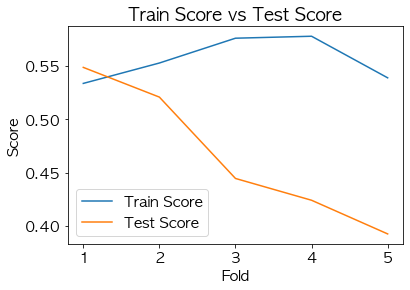

In [53]:
import matplotlib.pyplot as plt

train_scores = cv_results['train_r2']
test_scores = cv_results['test_r2']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

In [54]:
# ridge의 train, test r2 확인
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_scaled, y_scaled)
print(ridge.score(X_scaled, y_scaled))
print(ridge.score(X_test_scaled, y_test_scaled))

0.5566473578844933
0.5818039654031864


In [55]:
# 최종 모델 - Predict & 평가지표
# Train 전체로 학습 시
ridge.fit(X_scaled, y_scaled)
y_pred = ridge.predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.041, RMSE :  0.202, MAE: 0.202
Variance score :  0.582




In [56]:
# 최종 모델 - Predict & 평가지표

y_pred = cv_results['estimator'][0].predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.042, RMSE :  0.204, MAE: 0.204
Variance score :  0.573




In [57]:
# Ridge 회귀계수
ridge_df = pd.DataFrame(data = ridge.coef_, index = X_scaled.columns)
ridge_df.columns = ['회귀계수']
ridge_df.sort_values(by = '회귀계수',ascending=False)

,회귀계수
건물면적(㎡),1.348863
층,0.245717
금값종가,0.207491
부동산거래량,0.054334
선행지수순환변동치,0.051602
Fed기준금리,-0.036025
건물연식,-0.124315
LTV,-0.178743


In [58]:
# Lasso 
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_scaled, y_scaled)
print(lasso.score(X_scaled, y_scaled))
print(lasso.score(X_test_scaled, y_test_scaled))

0.0
-0.1514290238496836


In [59]:
lasso.coef_ == 0

array([ True,  True,  True,  True,  True,  True,  True,  True])

___

# 잔차항 검정
1. 정규성
2. 등분산성
3. 독립성

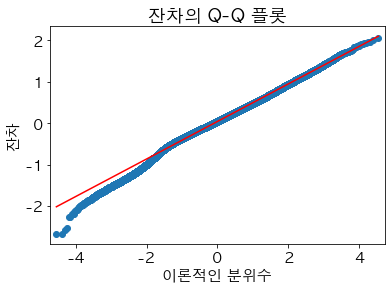

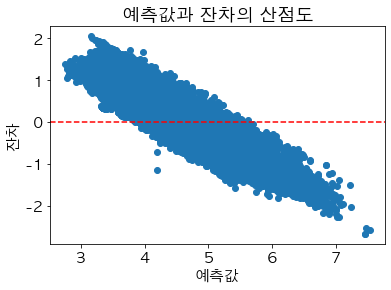

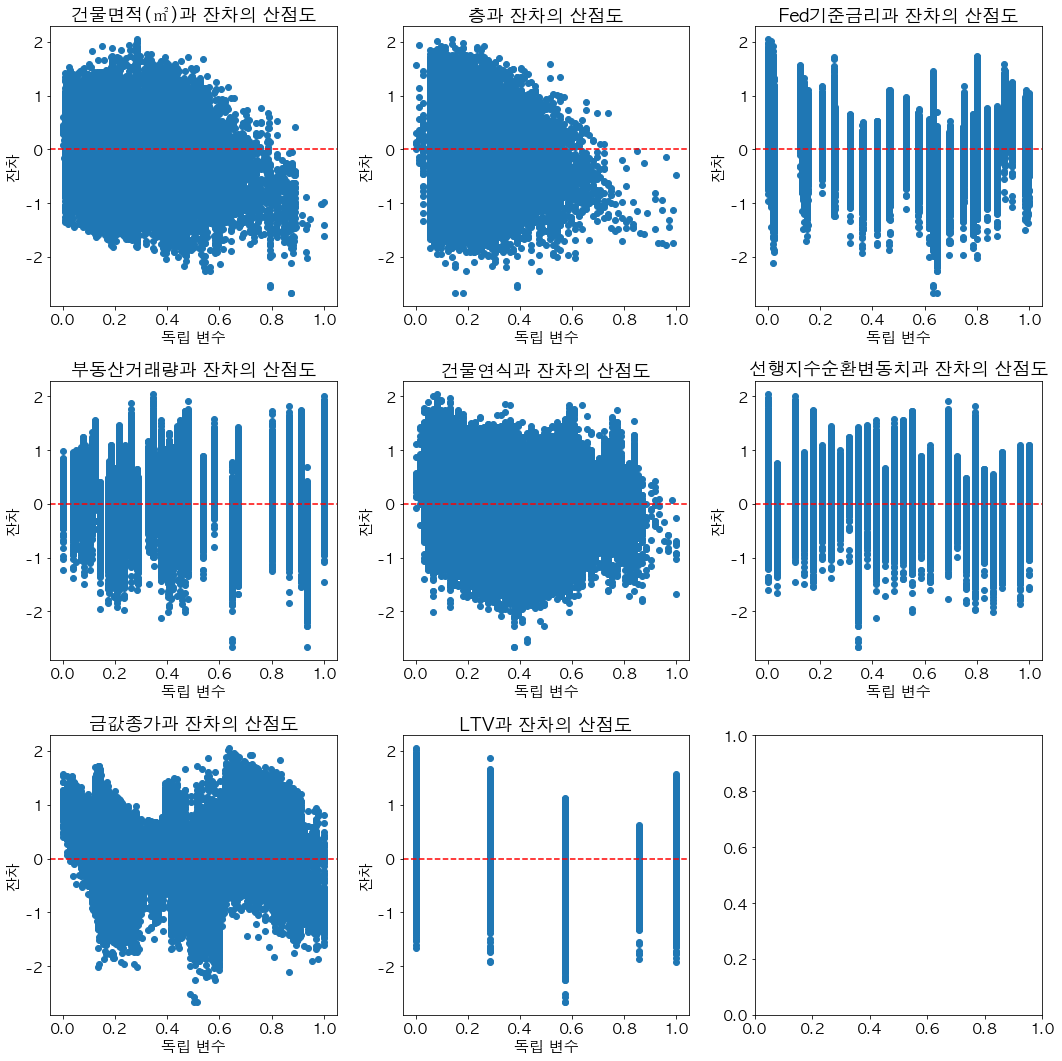

In [44]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

x = X_scaled
y = y_scaled

# 모델 적합
model = sm.OLS(y, x)  # 종속 변수 y와 독립 변수 X를 지정하여 모델 생성
result = model.fit()  # 모델 적합

# 잔차 추출
residuals = result.resid

# 잔차 분석
# 잔차의 정규성 확인: 잔차의 분포를 정규분포와 비교하여 정규성 검정을 수행합니다.
sm.qqplot(residuals, line='s')  # Q-Q plot을 그려서 정규성 확인
plt.xlabel('이론적인 분위수')
plt.ylabel('잔차')
plt.title('잔차의 Q-Q 플롯')
plt.show()

# 잔차의 등분산성 확인: 잔차와 예측값 사이의 관계를 살펴서 등분산성을 확인합니다.
plt.scatter(result.fittedvalues, residuals)
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.title('예측값과 잔차의 산점도')
plt.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가
plt.show()

# 잔차의 독립성 확인: 잔차와 독립 변수 간의 관계를 살펴서 독립성을 확인합니다.
num_cols = len(x.columns)
num_rows = math.ceil(num_cols / 3)  # 3개의 열로 나누어 출력하고자 한다면
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))
for i in range(num_cols):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.scatter(x.iloc[:, i], residuals)
    ax.set_xlabel('독립 변수')
    ax.set_ylabel('잔차')
    ax.set_title(f'{x.columns[i]}과 잔차의 산점도')
    ax.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가

plt.tight_layout()  # 그래프 간격 조정
plt.show()